In [ ]:
from pyod.models.copod import COPOD
import pandas as pd
from sklearn.model_selection import train_test_split

file = "OPCUA_dataset_public - Original.csv"
data = pd.read_csv(file)

# eliminar las columnas que no son numéricas
data = data.select_dtypes(include=["float64", "int64", "int32"])

# quitar las ultimas 2 columnas
# data = data.iloc[:, :-1]
data

,src_port,dst_port,flags,pktTotalCount,octetTotalCount,avg_ps,service_errors,status_errors,msg_size,min_msg_size,...,same_srv_rate,dst_host_same_src_port_rate,f_pktTotalCount,f_octetTotalCount,f_flowStart,f_rate,b_pktTotalCount,b_octetTotalCount,b_flowStart,label
0,40656,4840,1,2,219,109.5,0,0,87,28,...,0.0,0.0,1,125,1.583855e+09,1.250000e+19,1,94,1.583855e+09,0
1,44854,4840,1,2,219,109.5,0,0,87,28,...,0.0,0.0,1,125,1.583855e+09,1.250000e+19,1,94,1.583855e+09,0
2,44854,4840,1,2,399,199.5,0,0,267,132,...,0.0,0.0,1,198,1.583855e+09,1.980000e+19,1,201,1.583855e+09,0
3,40656,4840,1,2,399,199.5,0,0,267,132,...,0.0,0.0,1,198,1.583855e+09,1.980000e+19,1,201,1.583855e+09,0
4,45388,4840,1,2,219,109.5,0,0,87,28,...,0.0,0.0,1,125,1.583855e+09,1.250000e+19,1,94,1.583855e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107628,60560,4840,1,2,359,179.5,0,0,227,96,...,100.0,100.0,1,197,1.583862e+09,1.970000e+19,1,162,1.583862e+09,0
107629,60560,4840,1,2,358,179.0,0,0,226,95,...,100.0,100.0,1,197,1.583862e+09,1.970000e+19,1,161,1.583862e+09,0
107630,48970,4840,1,2,359,179.5,0,0,227,96,...,100.0,100.0,1,197,1.583862e+09,1.970000e+19,1,162,1.583862e+09,0
107631,60560,4840,1,2,359,179.5,0,0,227,96,...,100.0,100.0,1,197,1.583862e+09,1.970000e+19,1,162,1.583862e+09,0


In [44]:
data.describe()

,src_port,dst_port,flags,pktTotalCount,octetTotalCount,avg_ps,service_errors,status_errors,msg_size,min_msg_size,...,same_srv_rate,dst_host_same_src_port_rate,f_pktTotalCount,f_octetTotalCount,f_flowStart,f_rate,b_pktTotalCount,b_octetTotalCount,b_flowStart,label
count,107633.000000,107633.000000,107633.000000,107633.000000,107633.000000,107633.000000,107633.0,107633.0,107633.000000,107633.000000,...,107633.000000,107633.000000,107633.000000,107633.000000,1.076330e+05,1.076330e+05,107633.000000,107633.00000,1.076330e+05,107633.000000
mean,34670.758949,4840.465322,0.311912,1.311884,171.168712,115.207459,0.0,0.0,92.841433,51.927346,...,99.920640,99.919550,1.000139,120.723152,1.583857e+09,1.206957e+19,0.311745,50.44556,4.937591e+08,0.688144
std,18903.468159,152.660361,0.463276,0.465665,126.993029,43.537471,0.0,0.0,90.847418,29.724366,...,2.811976,2.830037,0.045721,52.345723,1.820011e+03,5.152434e+18,0.463208,75.20872,7.336560e+08,0.463254
min,1.000000,4840.000000,0.000000,1.000000,86.000000,86.000000,0.0,0.0,32.000000,28.000000,...,0.000000,0.000000,1.000000,86.000000,1.583855e+09,8.600000e+18,0.000000,0.00000,0.000000e+00,0.000000
25%,18381.000000,4840.000000,0.000000,1.000000,86.000000,86.000000,0.0,0.0,32.000000,32.000000,...,100.000000,100.000000,1.000000,86.000000,1.583856e+09,8.600000e+18,0.000000,0.00000,0.000000e+00,0.000000
50%,37994.000000,4840.000000,0.000000,1.000000,86.000000,86.000000,0.0,0.0,32.000000,32.000000,...,100.000000,100.000000,1.000000,86.000000,1.583856e+09,8.600000e+18,0.000000,0.00000,0.000000e+00,1.000000
75%,48970.000000,4840.000000,1.000000,2.000000,358.000000,179.000000,0.0,0.0,226.000000,95.000000,...,100.000000,100.000000,1.000000,197.000000,1.583857e+09,1.970000e+19,1.000000,161.00000,1.583856e+09,1.000000
max,65534.000000,54924.000000,1.000000,17.000000,3314.000000,490.500000,0.0,0.0,2192.000000,272.000000,...,100.000000,100.000000,16.000000,3152.000000,1.583862e+09,3.380000e+19,1.000000,643.00000,1.583862e+09,1.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107633 entries, 0 to 107632
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   src_port                     107633 non-null  int64  
 1   dst_port                     107633 non-null  int64  
 2   flags                        107633 non-null  int64  
 3   pktTotalCount                107633 non-null  int64  
 4   octetTotalCount              107633 non-null  int64  
 5   avg_ps                       107633 non-null  float64
 6   service_errors               107633 non-null  int64  
 7   status_errors                107633 non-null  int64  
 8   msg_size                     107633 non-null  int64  
 9   min_msg_size                 107633 non-null  int64  
 10  flowStart                    107633 non-null  float64
 11  flowEnd                      107633 non-null  float64
 12  flowDuration                 107633 non-null  float64
 13 

Text(0.5, 1.0, 'Ground Truth')

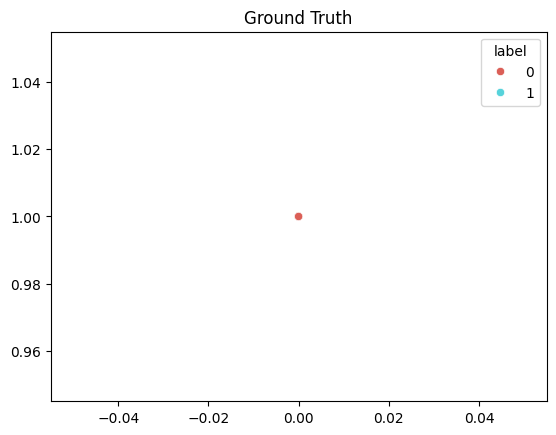

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=0, y=1, hue="label", data=data, palette="hls", legend="full")
plt.title("Ground Truth")

In [ ]:
# dividir el dataset en train y test
# columna label es Y
# y las demas son X
X = data.drop(columns=["label"])
y = data["label"]
# dividir en train y test
# TRAIN 80% TEST 20%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [54]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (86106, 26)
X_test shape: (21527, 26)


In [55]:
clf_name = "COPOD"
clf = COPOD()
clf.fit(X_train)

/home/mai_lavender/Escritorio/COMPUTER SCIENCE/2025-pao-i/metodología/pruebas/.venv/lib/python3.11/site-packages/pyod/models/copod.py:22: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return np.nan_to_num(skew_sp(X, axis=axis))


COPOD(contamination=0.1, n_jobs=1)

In [ ]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# it is possible to get the prediction confidence as well
y_test_pred, y_test_pred_confidence = clf.predict(
    X_test, return_confidence=True
)  # outlier labels (0 or 1) and confidence in the range of [0,1]

Text(0.5, 1.0, 'Anomaly Scores by PCA')

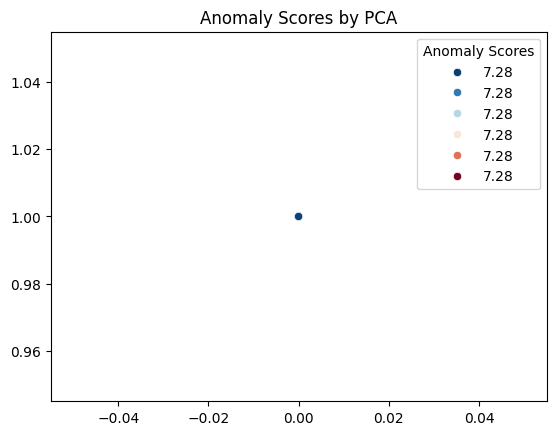

In [ ]:
ax = sns.scatterplot(x=0, y=1, hue=y_train_scores, data=X_train, palette="RdBu_r")

# Using legends, results look bit varied
legend_labels = [
    f"{score:.2f}" for score in np.unique(y_train_scores)
]  # Format scores up to 2 decimal places
ax.legend(
    title="Anomaly Scores", labels=legend_labels
)  # Create legend with title and labels
plt.title("Anomaly Scores by PCA")

In [ ]:
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
COPOD ROC:0.0022, precision @ rank n:0.5445

On Test Data:
COPOD ROC:0.0017, precision @ rank n:0.5558


In [60]:
df = data.copy().iloc[:, :-1]
outliers = clf.predict(df)

In [ ]:
df["outliers"] = outliers
# Display outliers
outliers_df = df[df["outliers"] == 1]
outliers_df

,src_port,dst_port,flags,pktTotalCount,octetTotalCount,avg_ps,service_errors,status_errors,msg_size,min_msg_size,...,same_srv_rate,dst_host_same_src_port_rate,f_pktTotalCount,f_octetTotalCount,f_flowStart,f_rate,b_pktTotalCount,b_octetTotalCount,b_flowStart,outliers
0,40656,4840,1,2,219,109.5,0,0,87,28,...,0.0,0.0,1,125,1.583855e+09,1.250000e+19,1,94,1.583855e+09,1
1,44854,4840,1,2,219,109.5,0,0,87,28,...,0.0,0.0,1,125,1.583855e+09,1.250000e+19,1,94,1.583855e+09,1
2,44854,4840,1,2,399,199.5,0,0,267,132,...,0.0,0.0,1,198,1.583855e+09,1.980000e+19,1,201,1.583855e+09,1
3,40656,4840,1,2,399,199.5,0,0,267,132,...,0.0,0.0,1,198,1.583855e+09,1.980000e+19,1,201,1.583855e+09,1
4,45388,4840,1,2,219,109.5,0,0,87,28,...,0.0,0.0,1,125,1.583855e+09,1.250000e+19,1,94,1.583855e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107628,60560,4840,1,2,359,179.5,0,0,227,96,...,100.0,100.0,1,197,1.583862e+09,1.970000e+19,1,162,1.583862e+09,1
107629,60560,4840,1,2,358,179.0,0,0,226,95,...,100.0,100.0,1,197,1.583862e+09,1.970000e+19,1,161,1.583862e+09,1
107630,48970,4840,1,2,359,179.5,0,0,227,96,...,100.0,100.0,1,197,1.583862e+09,1.970000e+19,1,162,1.583862e+09,1
107631,60560,4840,1,2,359,179.5,0,0,227,96,...,100.0,100.0,1,197,1.583862e+09,1.970000e+19,1,162,1.583862e+09,1


In [ ]:
normal = df[df["outliers"] == 0]
normal

,src_port,dst_port,flags,pktTotalCount,octetTotalCount,avg_ps,service_errors,status_errors,msg_size,min_msg_size,...,same_srv_rate,dst_host_same_src_port_rate,f_pktTotalCount,f_octetTotalCount,f_flowStart,f_rate,b_pktTotalCount,b_octetTotalCount,b_flowStart,outliers
89,44376,4840,1,2,357,178.5,0,0,225,94,...,100.0,100.0,1,197,1.583855e+09,1.970000e+19,1,160,1.583855e+09,0
91,50892,4840,1,2,358,179.0,0,0,226,95,...,100.0,100.0,1,197,1.583855e+09,1.970000e+19,1,161,1.583855e+09,0
93,44854,4840,1,2,357,178.5,0,0,225,94,...,100.0,100.0,1,197,1.583855e+09,1.970000e+19,1,160,1.583855e+09,0
95,45388,4840,1,2,358,179.0,0,0,226,95,...,100.0,100.0,1,197,1.583855e+09,1.970000e+19,1,161,1.583855e+09,0
104,44854,4840,1,2,358,179.0,0,0,226,95,...,100.0,100.0,1,197,1.583855e+09,1.970000e+19,1,161,1.583855e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103996,8474,4840,0,1,86,86.0,0,0,32,32,...,100.0,100.0,1,86,1.583861e+09,8.600000e+18,0,0,0.000000e+00,0
103997,8475,4840,0,1,86,86.0,0,0,32,32,...,100.0,100.0,1,86,1.583861e+09,8.600000e+18,0,0,0.000000e+00,0
103998,8476,4840,0,1,86,86.0,0,0,32,32,...,100.0,100.0,1,86,1.583861e+09,8.600000e+18,0,0,0.000000e+00,0
103999,8477,4840,0,1,86,86.0,0,0,32,32,...,100.0,100.0,1,86,1.583861e+09,8.600000e+18,0,0,0.000000e+00,0
